<a href="https://colab.research.google.com/github/NivethaChinnaraj/project/blob/main/Mall_CustomerSegmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns



Load the Dataset

In [56]:
data=pd.read_excel('Mall_Customers.xlsx')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Null Values

In [57]:
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Encoding and Format the Features


In [58]:
change_Income = 84
data['Annual Income (k$)'] = data['Annual Income (k$)'] * 1000 * change_Income
data.rename(columns={'Annual Income (k$)': 'Annual Income (INR)'}, inplace=True)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

data.head()


,CustomerID,Gender,Age,Annual Income (INR),Spending Score (1-100)
0,1,0,19,1260000,39
1,2,0,21,1260000,81
2,3,1,20,1344000,6
3,4,1,23,1344000,77
4,5,1,31,1428000,40


Perform Clustering


In [59]:
x=data[['Annual Income (INR)', 'Spending Score (1-100)', 'Age', 'Gender']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x_scaled)
data['Cluster']=kmeans.labels_
print(data.head())


   CustomerID  Gender  Age  Annual Income (INR)  Spending Score (1-100)  \
0           1       0   19              1260000                      39   
1           2       0   21              1260000                      81   
2           3       1   20              1344000                       6   
3           4       1   23              1344000                      77   
4           5       1   31              1428000                      40   

   Cluster  
0        2  
1        2  
2        0  
3        2  
4        0  


Summarize the Cluster

In [60]:
cluster_groups = data.groupby('Cluster')
cluster_summary = cluster_groups.agg(['mean', 'median', 'std'])
print(cluster_summary)

         CustomerID                      Gender                         Age  \
               mean median        std      mean median       std       mean   
Cluster                                                                       
0         67.676056   68.0  36.830024  0.605634    1.0  0.492193  52.169014   
1        167.171429  169.0  22.405994  0.371429    0.0  0.490241  40.228571   
2        100.468085  105.0  58.892594  0.595745    1.0  0.493379  28.276596   

                          Annual Income (INR)                           \
        median        std                mean     median           std   
Cluster                                                                  
0         50.0  10.916548        3.920789e+06  4032000.0  1.336537e+06   
1         41.0  10.507940        7.672800e+06  7308000.0  1.598591e+06   
2         29.0   6.191226        5.005149e+06  5208000.0  2.138944e+06   

        Spending Score (1-100)                    
                          mea

**Cluster 0 - Moderate Spenders**

**Gender:** Mostly females (mean = 0.61).
**Age:** Older age group with an average age of 52 years. The low SD (10.9) suggests that most people in this cluster are around this age, with little variation.
**Annual Income:** Moderate-income level with an average income of approximately 3.92 million INR. The SD (1.34 million) is moderately high, showing some variation in income within this group.
Spending Score: Moderate spenders with an average spending score of 39.3. The SD (16.4) indicates some variety in spending habits, but most are close to the average score.
**Summary:** Cluster 0 consists primarily of older female customers with moderate income and moderate spending behavior. They have relatively similar ages, but their incomes and spending scores vary moderately.

**Cluster 1 - low Spenders**
**Gender**: Predominantly males (mean = 0.37).
**Age**: Middle-aged group with an average age of 40 years. The SD (10.5) suggests a bit of variation, but most customers are close to this age range.
**Annual Income**: High-income group with an average income of about 7.67 million INR. A moderately high SD (1.6 million) shows some income variation within this cluster.
Spending Score: Low spenders with an average spending score of 20.6. The SD (17.3) indicates that there are quite a few customers who spend significantly less or more than the average.
**Summary:** Cluster 1 is mainly composed of middle-aged male customers with high income but low spending behavior. They show moderate variation in age and income, and there is a mix of low and slightly higher spenders.

**Cluster 2 - High Spenders**
**Gender:** Mostly females (mean = 0.60).
**Age:** Younger age group with an average age of 28 years. The SD (6.2) is low, indicating that customers in this cluster are close in age.
**Annual Income**: Moderate-income level with an average income of approximately 5 million INR. The high SD (2.1 million) suggests a wide income range, from low to high within this cluster.
**Spending Score:** High spenders with an average score of 69.4. The SD (17.9) shows some variation in spending, with some people spending much more or less than the average.
**Summary:** Cluster 2 consists mostly of younger female customers with moderate income and high spending behavior. Their ages are quite similar, but there is a significant variation in income and


Add the Cluster Title

In [61]:
cluster_titles = {
    0: "Moderate Spenders",
    1: "Low Spenders ",
    2: "High Spenders "
}
data['Cluster_Title'] = data['Cluster'].map(cluster_titles)
print(data.head())

   CustomerID  Gender  Age  Annual Income (INR)  Spending Score (1-100)  \
0           1       0   19              1260000                      39   
1           2       0   21              1260000                      81   
2           3       1   20              1344000                       6   
3           4       1   23              1344000                      77   
4           5       1   31              1428000                      40   

   Cluster      Cluster_Title  
0        2     High Spenders   
1        2     High Spenders   
2        0  Moderate Spenders  
3        2     High Spenders   
4        0  Moderate Spenders  


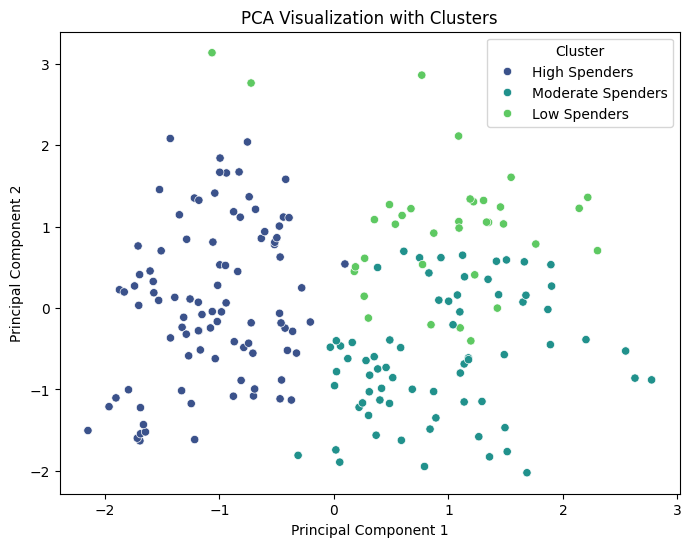

In [62]:
pca = PCA(n_components=2)  # 2 components for 2D visualization
X_pca = pca.fit_transform(x_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the cluster labels to the PCA DataFrame for visualization
pca_df['Cluster'] = data['Cluster_Title']

# Visualize the PCA results with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Visualization with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()